In [1]:
import acquire
import prep
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

acquire.py functions loaded successfully
prep.py functions loaded successfully


After creating the Acquire and Prep files, I imported them to assess the data further

In [2]:
df = prep.prep_zillow_data()
df.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
0,14297519,261.000000,3.500000,4.000000,3.500000,3100.000000,3100.000000,6059.000000,3.000000,33634931.000000,-117869207.000000,4506.000000,122,60590630.072012,53571.000000,1286.000000,96978.000000,0.000000,1998.000000,485713.000000,1023282.000000,2016.000000,537569.000000,11013.720000,60590630072012.000000,0.025595,2017-01-01,Single Family Residential,0,1,0
1,17052889,261.000000,1.000000,2.000000,1.000000,1465.000000,1465.000000,6111.000000,1.000000,34449266.000000,-119281531.000000,12647.000000,1110,61110010.023006,13091.000000,2061.000000,97099.000000,5.000000,1967.000000,88000.000000,464000.000000,2016.000000,376000.000000,5672.480000,61110010023006.000000,0.055619,2017-01-01,Single Family Residential,0,0,1
2,14186244,261.000000,2.000000,3.000000,2.000000,1243.000000,1243.000000,6059.000000,2.000000,33886168.000000,-117823170.000000,8432.000000,122,60590218.022012,21412.000000,1286.000000,97078.000000,6.000000,1962.000000,85289.000000,564778.000000,2016.000000,479489.000000,6488.300000,60590218022012.000000,0.005383,2017-01-01,Single Family Residential,0,1,0
3,12177905,261.000000,3.000000,4.000000,3.000000,2376.000000,2376.000000,6037.000000,3.000000,34245180.000000,-118240722.000000,13038.000000,0101,60373001.001006,396551.000000,3101.000000,96330.000000,0.000000,1970.000000,108918.000000,145143.000000,2016.000000,36225.000000,1777.510000,60373001001006.000000,-0.103410,2017-01-01,Single Family Residential,1,0,0
4,10887214,266.000000,3.000000,3.000000,3.000000,1312.000000,1312.000000,6037.000000,3.000000,34185120.000000,-118414640.000000,278581.000000,010C,60371236.012000,12447.000000,3101.000000,96451.000000,0.000000,1964.000000,73681.000000,119407.000000,2016.000000,45726.000000,1533.890000,60371236012000.000000,0.006940,2017-01-01,Condominium,1,0,0


In [3]:
#Check for nulls in the data
df.isnull().sum().sort_values(ascending = False)

is_ventura_county               0
regionidcity                    0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcounty                  0
is_orange_county                0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
tdate                           0
propertylandusedesc             0
is_la_county  

In [4]:
#split the data into train, validate, and test
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, train_size=.8, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [5]:
train.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
68596,10905018,261.000000,2.000000,2.000000,2.000000,1015.000000,1015.000000,6037.000000,2.000000,34148228.000000,-118425721.000000,5192.000000,0101,60371411.012014,12447.000000,3101.000000,96424.000000,0.000000,1947.000000,156137.000000,223042.000000,2016.000000,66905.000000,2774.910000,60371411012014.000000,0.053693,2017-08-22,Single Family Residential,1,0,0
46472,14456758,261.000000,4.000000,5.000000,4.000000,2744.000000,2744.000000,6059.000000,4.000000,33543786.000000,-117632527.000000,6456.000000,1,60590320.592003,52835.000000,1286.000000,96998.000000,0.000000,2003.000000,428684.000000,765157.000000,2016.000000,336473.000000,11010.000000,60590320592003.000000,0.003385,2017-06-15,Single Family Residential,0,1,0
7447,17071579,261.000000,2.000000,3.000000,2.000000,1894.000000,1894.000000,6111.000000,2.000000,34294717.000000,-119211311.000000,12694.000000,1110,61110017.001005,34543.000000,2061.000000,97083.000000,6.000000,1975.000000,260919.000000,746208.000000,2016.000000,485289.000000,7800.360000,61110017001005.000000,-0.181796,2017-02-02,Single Family Residential,0,0,1
60224,17239698,266.000000,1.000000,1.000000,1.000000,531.000000,531.000000,6111.000000,1.000000,34287500.000000,-118706000.000000,29969.280611,1129,61110084.012013,27110.000000,2061.000000,97116.000000,3.000000,1983.000000,68147.000000,136294.000000,2016.000000,68147.000000,1819.000000,61110084012013.000000,0.016632,2017-07-25,Condominium,0,0,1
47117,14210332,261.000000,1.500000,3.000000,1.500000,1324.000000,1324.000000,6059.000000,1.000000,33842500.000000,-117853000.000000,1116.000000,122,60590762.015002,33252.000000,1286.000000,97063.000000,6.000000,1971.000000,33417.000000,48719.000000,2016.000000,15302.000000,776.880000,60590762015002.000000,-0.074844,2017-06-16,Single Family Residential,0,1,0


In [6]:
df.shape

(75538, 31)

# Explore the Data

In [7]:
train.describe()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,is_la_county,is_orange_county,is_ventura_county
count,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000,45322.000000
mean,12995111.021800,262.019946,2.267729,3.036406,2.267768,1737.352909,1726.506213,6048.859009,2.200278,34008367.899365,-118202988.287234,29713.064898,60491683.194858,33481.088148,2530.652487,96582.986131,1.501412,1968.646080,179213.810730,466542.934535,2016.000000,287517.093310,5712.802540,60500916999494.968750,0.016278,0.651361,0.268082,0.080557
std,3104889.670598,3.759747,0.871152,1.009388,0.871117,828.317371,812.261228,20.742579,0.855878,266082.656276,360297.607460,120413.480416,205849.187884,45812.423639,803.100129,3511.836558,2.835721,23.612893,172751.319252,502273.001674,0.000000,381123.194449,5794.897667,1995388269588.849365,0.165392,0.476545,0.442965,0.272156
min,10711877.000000,246.000000,1.000000,1.000000,1.000000,242.000000,242.000000,6037.000000,1.000000,33339527.000000,-119448392.000000,236.000000,60371011.101000,3491.000000,1286.000000,95982.000000,0.000000,1824.000000,44.000000,1000.000000,2016.000000,161.000000,62.440000,60371011101000.000000,-4.655420,0.000000,0.000000,0.000000
25%,11532128.750000,261.000000,2.000000,2.000000,2.000000,1176.000000,1180.000000,6037.000000,2.000000,33813710.750000,-118417241.750000,5939.000000,60373109.003001,12447.000000,1286.000000,96197.000000,0.000000,1953.000000,83986.500000,206896.500000,2016.000000,85121.500000,2710.940000,60373111252509.500000,-0.024056,0.000000,0.000000,0.000000
50%,12533831.000000,261.000000,2.000000,3.000000,2.000000,1529.000000,1544.000000,6037.000000,2.000000,34021081.000000,-118179188.500000,7541.500000,60376034.003013,25218.000000,3101.000000,96393.000000,0.000000,1970.000000,135546.000000,357143.000000,2016.000000,203050.000000,4426.080000,60376037042016.500000,0.006529,1.000000,0.000000,0.000000
75%,14219837.750000,266.000000,3.000000,4.000000,3.000000,2073.000000,2025.000000,6059.000000,3.000000,34175748.500000,-117926836.000000,21305.750000,60590423.262013,45398.000000,3101.000000,96987.000000,0.000000,1987.000000,215211.500000,563000.000000,2016.000000,363245.250000,6839.955000,60590423249258.500000,0.038471,1.000000,1.000000,0.000000
max,167688532.000000,275.000000,5.500000,7.000000,5.500000,12616.000000,12616.000000,6111.000000,5.000000,34818767.000000,-117554636.000000,6971010.000000,61110091.001004,396556.000000,3101.000000,399675.000000,13.000000,2016.000000,7507773.000000,23858374.000000,2016.000000,16350601.000000,276797.830000,483030105084015.000000,3.394544,1.000000,1.000000,1.000000


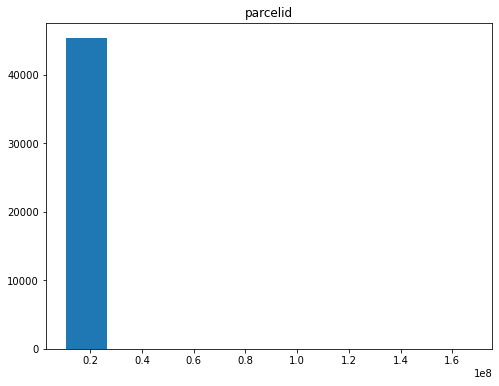

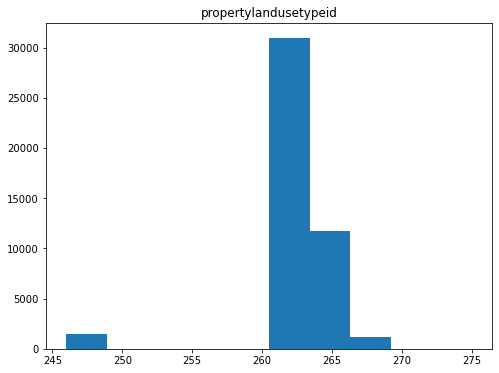

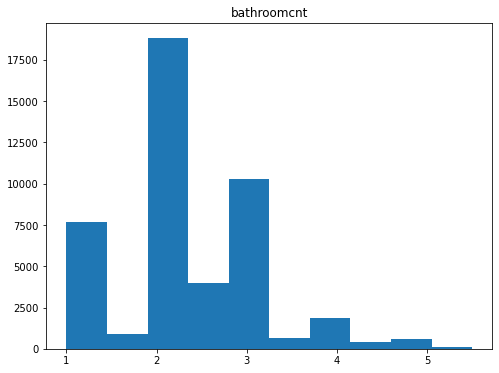

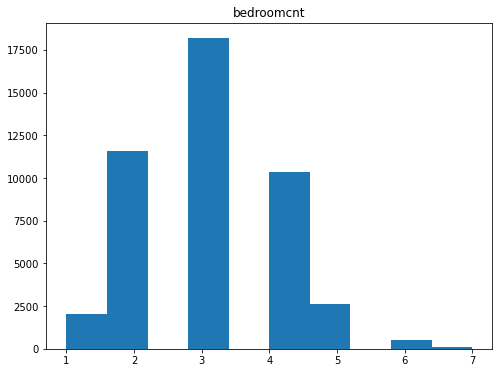

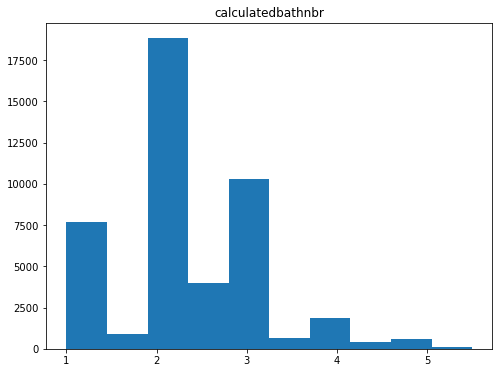

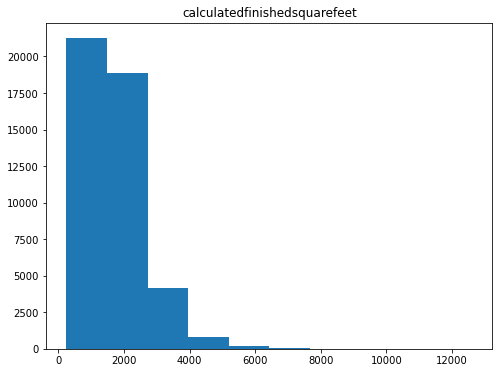

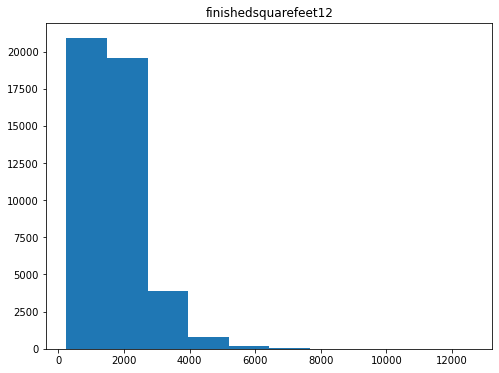

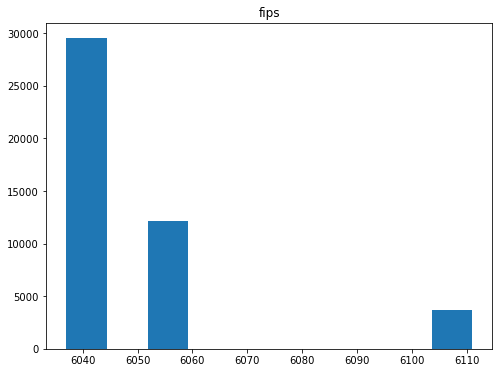

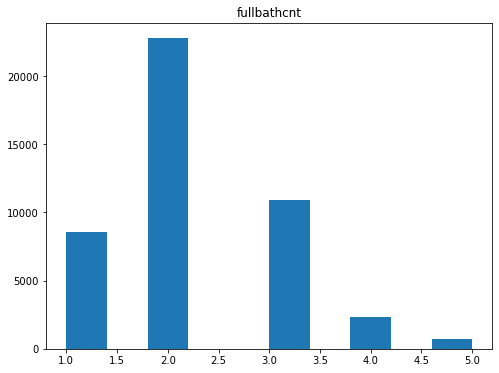

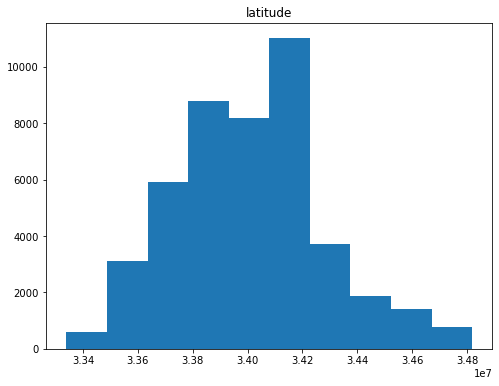

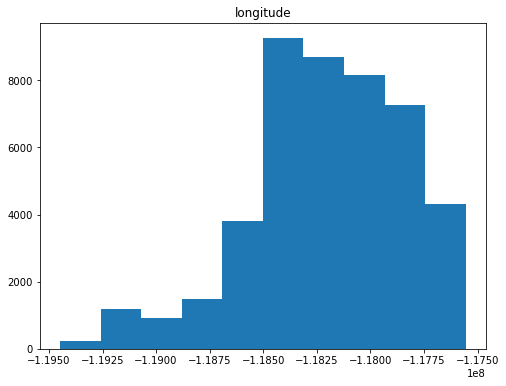

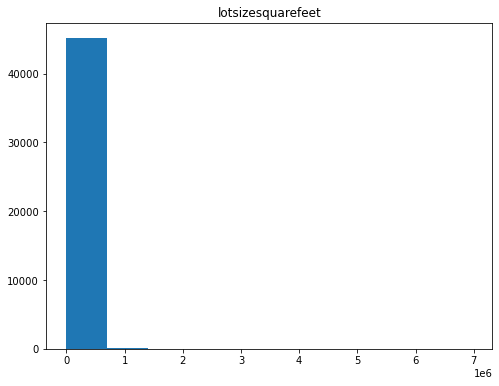

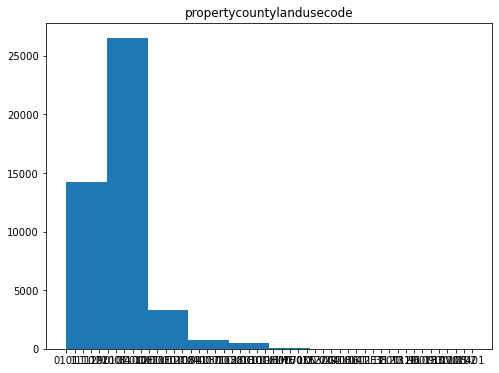

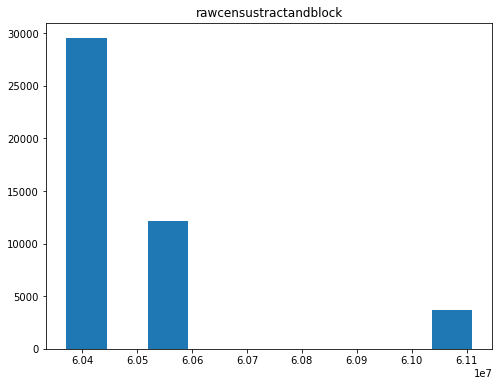

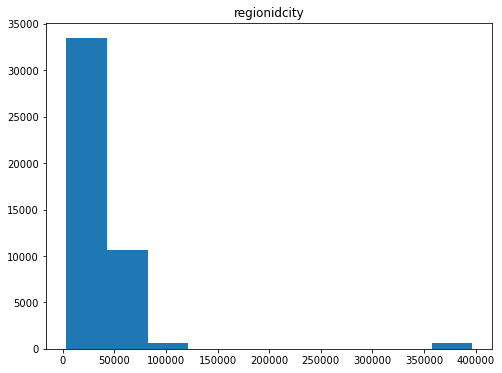

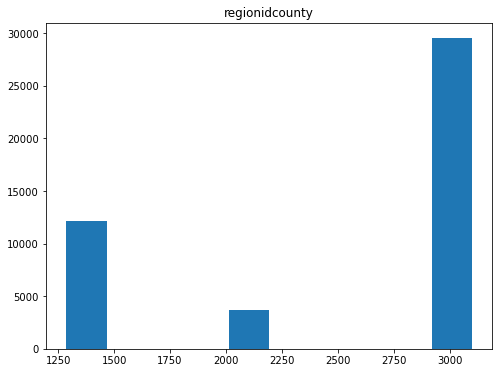

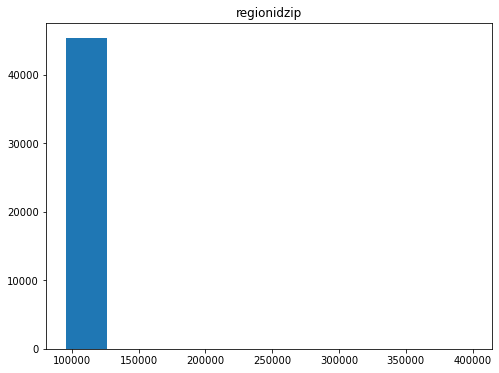

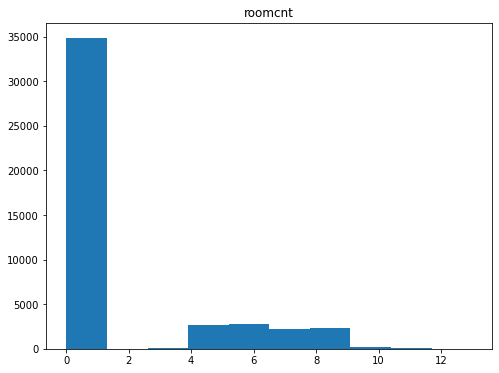

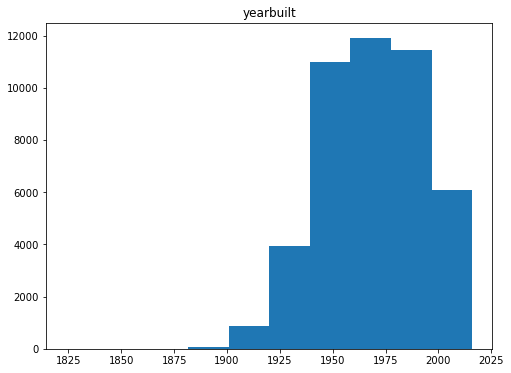

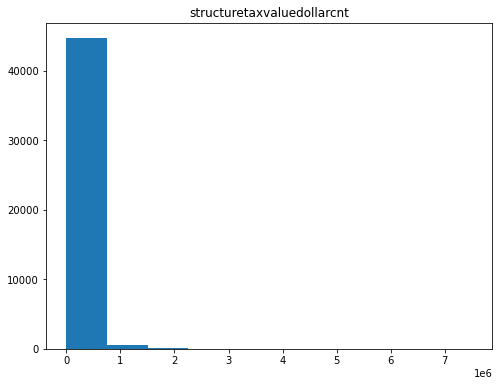

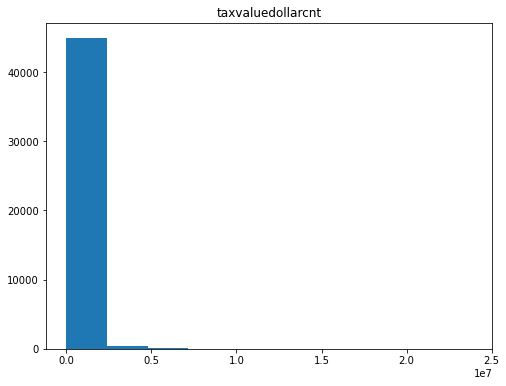

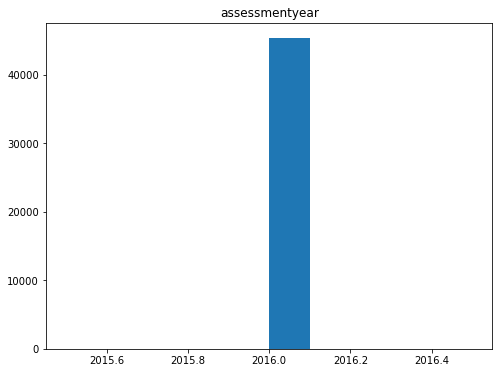

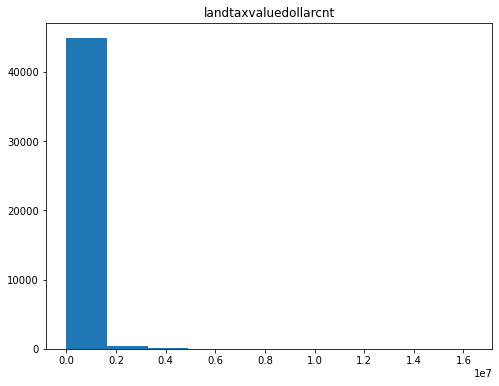

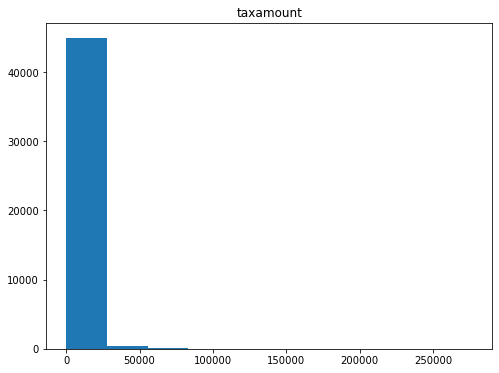

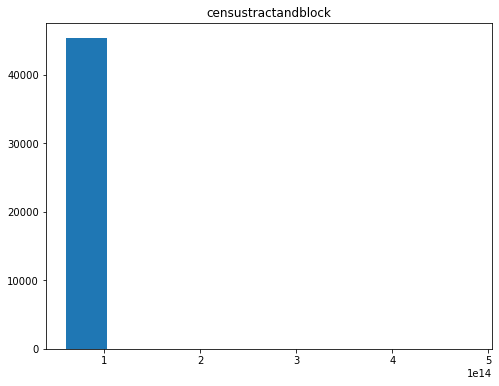

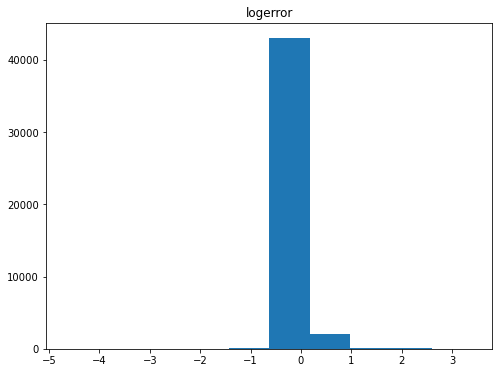

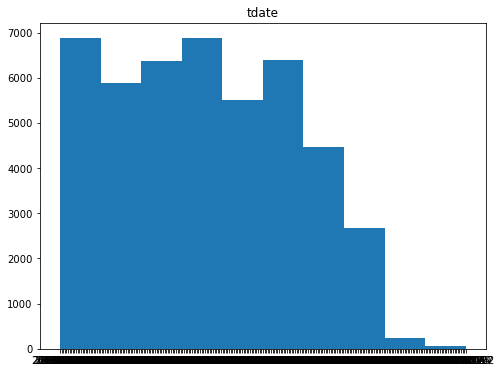

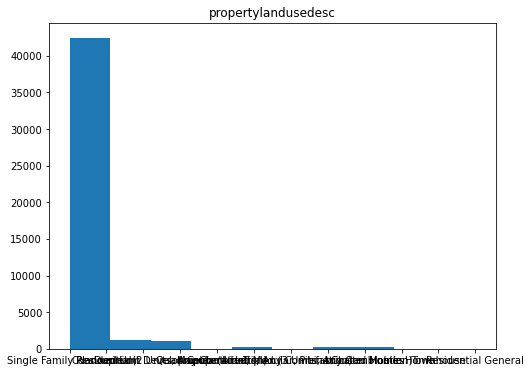

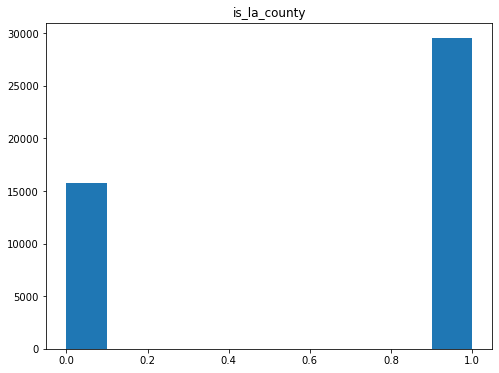

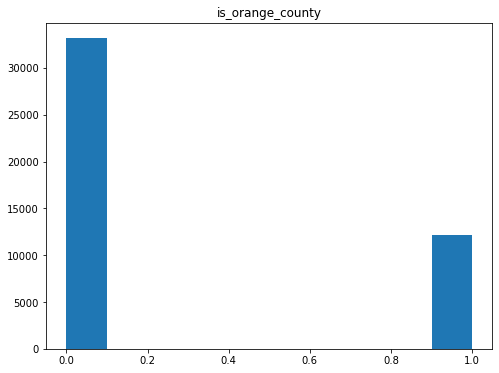

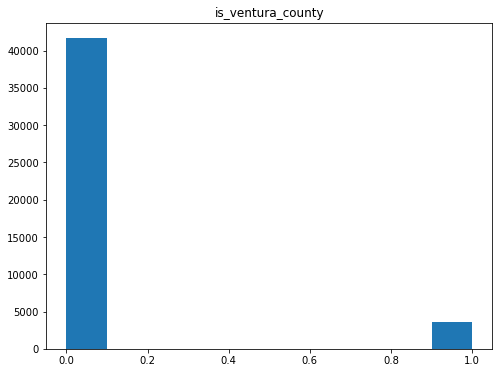

In [8]:
for column in train.columns:
    plt.figure(figsize=(8,6))
    plt.hist(train[column])
    plt.title(column)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

# Takeaways
- Log error is pretty accurate and only deviates about 2 from zero but overall very accurate.

- There are fewer outliers present after I removed houses that have more than 8 bedrooms, since the buying market is very niche at those price points.

- There are quite a lot of homes still being sold that were built before the 70's

- There also appears to be a reduction in home production in the 2000's, unsure if this was due to market crash or lack of space.

- Room count does not appear to be an accurate feature to use for our predictions

- Fips would be a good feature to cluster on, this would aide in addressing the outliers

- I still like bedroom, bathroom, full bathroom as features for my modeling. These features aided a lot in the

- Calculated bath and bedroom count is redundant info based on the histograms

In [9]:
train.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
68596,10905018,261.000000,2.000000,2.000000,2.000000,1015.000000,1015.000000,6037.000000,2.000000,34148228.000000,-118425721.000000,5192.000000,0101,60371411.012014,12447.000000,3101.000000,96424.000000,0.000000,1947.000000,156137.000000,223042.000000,2016.000000,66905.000000,2774.910000,60371411012014.000000,0.053693,2017-08-22,Single Family Residential,1,0,0
46472,14456758,261.000000,4.000000,5.000000,4.000000,2744.000000,2744.000000,6059.000000,4.000000,33543786.000000,-117632527.000000,6456.000000,1,60590320.592003,52835.000000,1286.000000,96998.000000,0.000000,2003.000000,428684.000000,765157.000000,2016.000000,336473.000000,11010.000000,60590320592003.000000,0.003385,2017-06-15,Single Family Residential,0,1,0
7447,17071579,261.000000,2.000000,3.000000,2.000000,1894.000000,1894.000000,6111.000000,2.000000,34294717.000000,-119211311.000000,12694.000000,1110,61110017.001005,34543.000000,2061.000000,97083.000000,6.000000,1975.000000,260919.000000,746208.000000,2016.000000,485289.000000,7800.360000,61110017001005.000000,-0.181796,2017-02-02,Single Family Residential,0,0,1
60224,17239698,266.000000,1.000000,1.000000,1.000000,531.000000,531.000000,6111.000000,1.000000,34287500.000000,-118706000.000000,29969.280611,1129,61110084.012013,27110.000000,2061.000000,97116.000000,3.000000,1983.000000,68147.000000,136294.000000,2016.000000,68147.000000,1819.000000,61110084012013.000000,0.016632,2017-07-25,Condominium,0,0,1
47117,14210332,261.000000,1.500000,3.000000,1.500000,1324.000000,1324.000000,6059.000000,1.000000,33842500.000000,-117853000.000000,1116.000000,122,60590762.015002,33252.000000,1286.000000,97063.000000,6.000000,1971.000000,33417.000000,48719.000000,2016.000000,15302.000000,776.880000,60590762015002.000000,-0.074844,2017-06-16,Single Family Residential,0,1,0


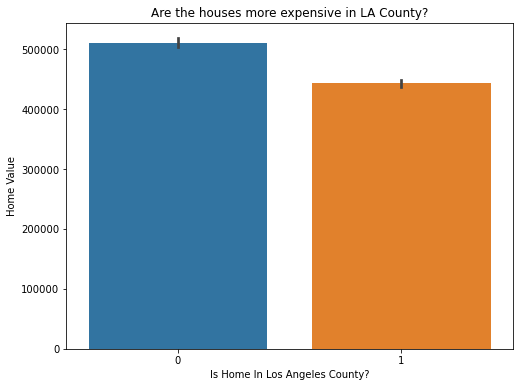

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(train.is_la_county, train.logerror)
plt.title("Are there more log error for houses in LA County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Los Angeles County?')
plt.show()

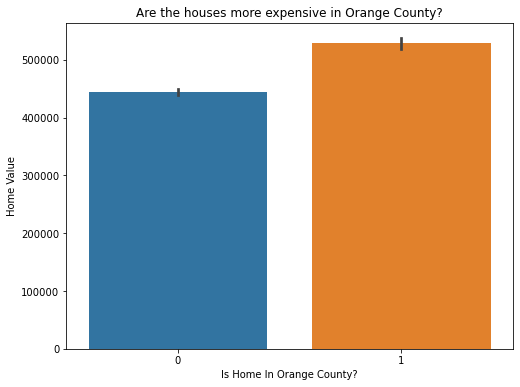

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(train.is_orange_county, train.logerror)
plt.title("Are there more log error for houses in Orange County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Orange County?')
plt.show()

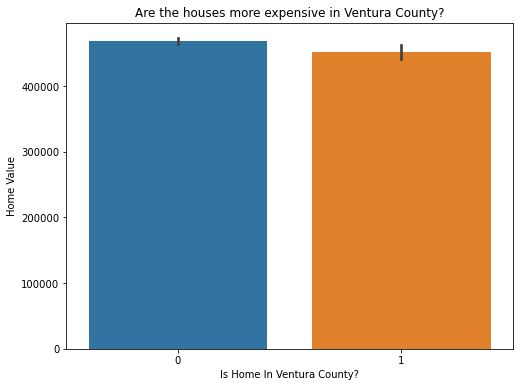

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(train.is_ventura_county, train.logerror)
plt.title("Are there more log error for houses in Ventura County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Ventura County?')
plt.show()

# Hypothesis Testing

### Hypothesis Test 1

$H$0 - There is no difference in price between houses in Orange County and Los Angeles/Ventura Counties

$H$a - There is a differen between houses in Orange County and Los Angeles/Ventura Counties

In [15]:
la_county = train[train.is_la_county == 1]
not_la_county = train[train.is_la_county == 0]

stats.levene(la_county.logerror, not_la_county.logerror)

LeveneResult(statistic=50.17428169896208, pvalue=1.4272360138806802e-12)

In [16]:
stats.ttest_ind(la_county.logerror, 
                not_la_county.logerror, 
                equal_var=True)

Ttest_indResult(statistic=-2.104160090570348, pvalue=0.035369978166740416)

## Conclusion
- p < null, we reject the null hypothesis and there is a difference in log error for homes in LA county

Is There A Relationship Between Home Value And Square Feet?


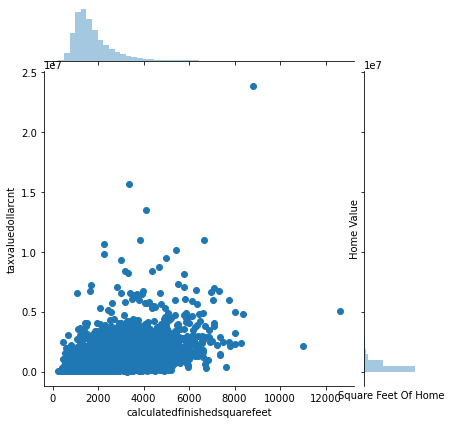

In [22]:
print('Is There A Relationship Between Home Value And Square Feet?')
sns.jointplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data=train)
plt.xlabel("Square Feet Of Home")
plt.ylabel("Home Value")
plt.show()

## Conclusion
- There appears to be a linear relationship between square feet of home and the value of the home
- This will be valueable when we begin our modeling and selecting best features

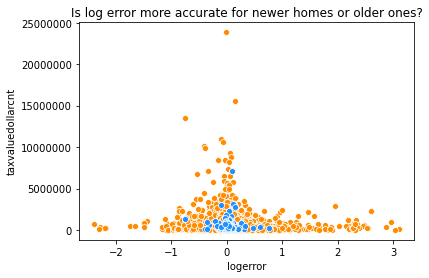

In [31]:
sns.scatterplot(x='logerror', y='taxvaluedollarcnt',
               data=train[train.yearbuilt<=1970], color='darkorange')
sns.scatterplot(x='logerror', y='taxvaluedollarcnt',
               data=train[(train.yearbuilt>1969) & (train.yearbuilt<=1970)], 
                color='dodgerblue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Is log error more accurate for newer homes or older ones?")
plt.show()

## Conclusion
- It appears that most of the error occurs in the homes older than 1970
- This information will be very helpful to consider when we start assessing clusters